comparing 2014,2016 and 2021 there are no diff in merging data and geo. always 7052 rows. 
this KG are missing in geo 
Feistritz im Rosental     60
Zandlach                  22
Gösselsdorf                3
Woroujach 
+ about 100 NA at KG_NR 

WORKFLOW
on geodf with KG as rows:
add column frequency of ...
add column sum of ...


In [9]:
#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
%matplotlib inline
from shapely import wkt
data=pd.read_excel('output/Karn.xlsx')

geo=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')

#prepare for merge
geo.KG_NR=geo.KG_NR.astype(int)
data.replace({'?':0}, inplace=True)
data.fillna(0,inplace=True)
data=data[data.KG!=0]
data.KG=data.KG.astype(int)
data.rename(columns={'KG':'KG_NR'},inplace=True)
merged=pd.merge(data,geo, on='KG_NR')


merged.fillna(0,inplace=True)
#merged.freq=merged.freq.astype(int)
#merged.freq.value_counts()



In [10]:
#add frequency and sum column
data['freq'] = data.groupby('KG_NR')['KG_NR'].transform('count')
data['sum_EW']=data.groupby('KG_NR')['EW 60'].transform('sum')
to_choro_plot=data.drop_duplicates(subset='KG_NR')


In [11]:


to_choro_plot['geometry'] = to_choro_plot['geometry'].apply(wkt.loads) 
gdf = geopandas.GeoDataFrame(to_choro_plot, crs='EPSG:31287')


KeyError: 'geometry'

AttributeError: No geometry data set yet (expected in column 'geometry'.)

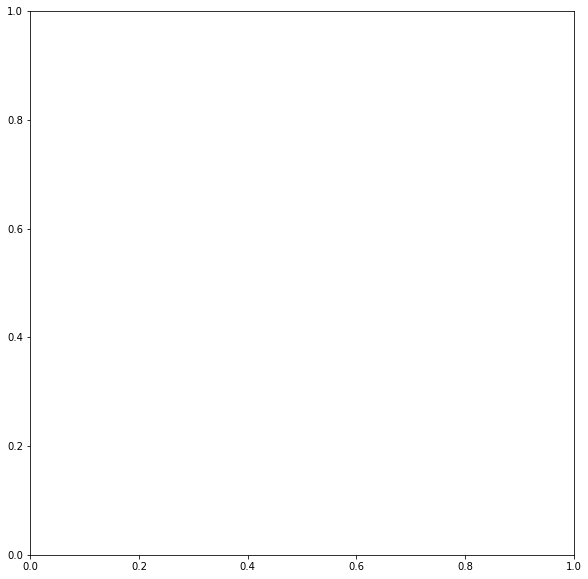

In [ ]:
fig, ax = plt.subplots(1,figsize = (10,10))
gdf.plot(column='freq' ,ax=ax)


AttributeError: No geometry data set yet (expected in column 'geometry'.)

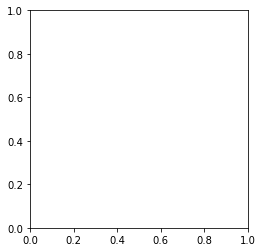

In [ ]:
gdf.plot()

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,5))
merged.plot(column='freq',ax=ax,legend=True,legend_kwds={'shrink': 0.3,'orientation':'horizontal'})
ax.set_axis_off()



In [ ]:
merged.sort_values('freq')